In [7]:
from pre3 import data_pre
from input_data import input_df
import matplotlib.pyplot as plt

In [2]:
df = input_df()
df = data_pre(df)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 1117225 to 47008266
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   都道府県名         651975 non-null  category
 1   市区町村名         651975 non-null  category
 2   地区名           651318 non-null  category
 3   最寄駅：名称        649342 non-null  category
 4   最寄駅：距離（分）     628916 non-null  float64 
 5   間取り           629546 non-null  category
 6   面積（㎡）         651975 non-null  float64 
 7   建築年           633280 non-null  float64 
 8   建物の構造         637098 non-null  category
 9   用途            601333 non-null  category
 10  今後の利用目的       288948 non-null  category
 11  都市計画          633162 non-null  category
 12  建ぺい率（％）       629168 non-null  float64 
 13  容積率（％）        629168 non-null  float64 
 14  取引時点          651975 non-null  float64 
 15  改装            593301 non-null  category
 16  取引の事情等        18397 non-null   category
 17  取引価格（総額）_log  651975 

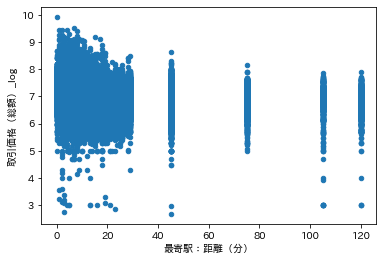

In [8]:
# 仮説
# 築年数が長いほど価格は安くなる

df.plot.scatter(x='最寄駅：距離（分）', y='取引価格（総額）_log')
plt.show()

都道府県ごとに最寄駅からの距離が価格と相関があるのか確認

In [9]:
pref_list = df["都道府県名"].tolist()
pref_list = set(pref_list)

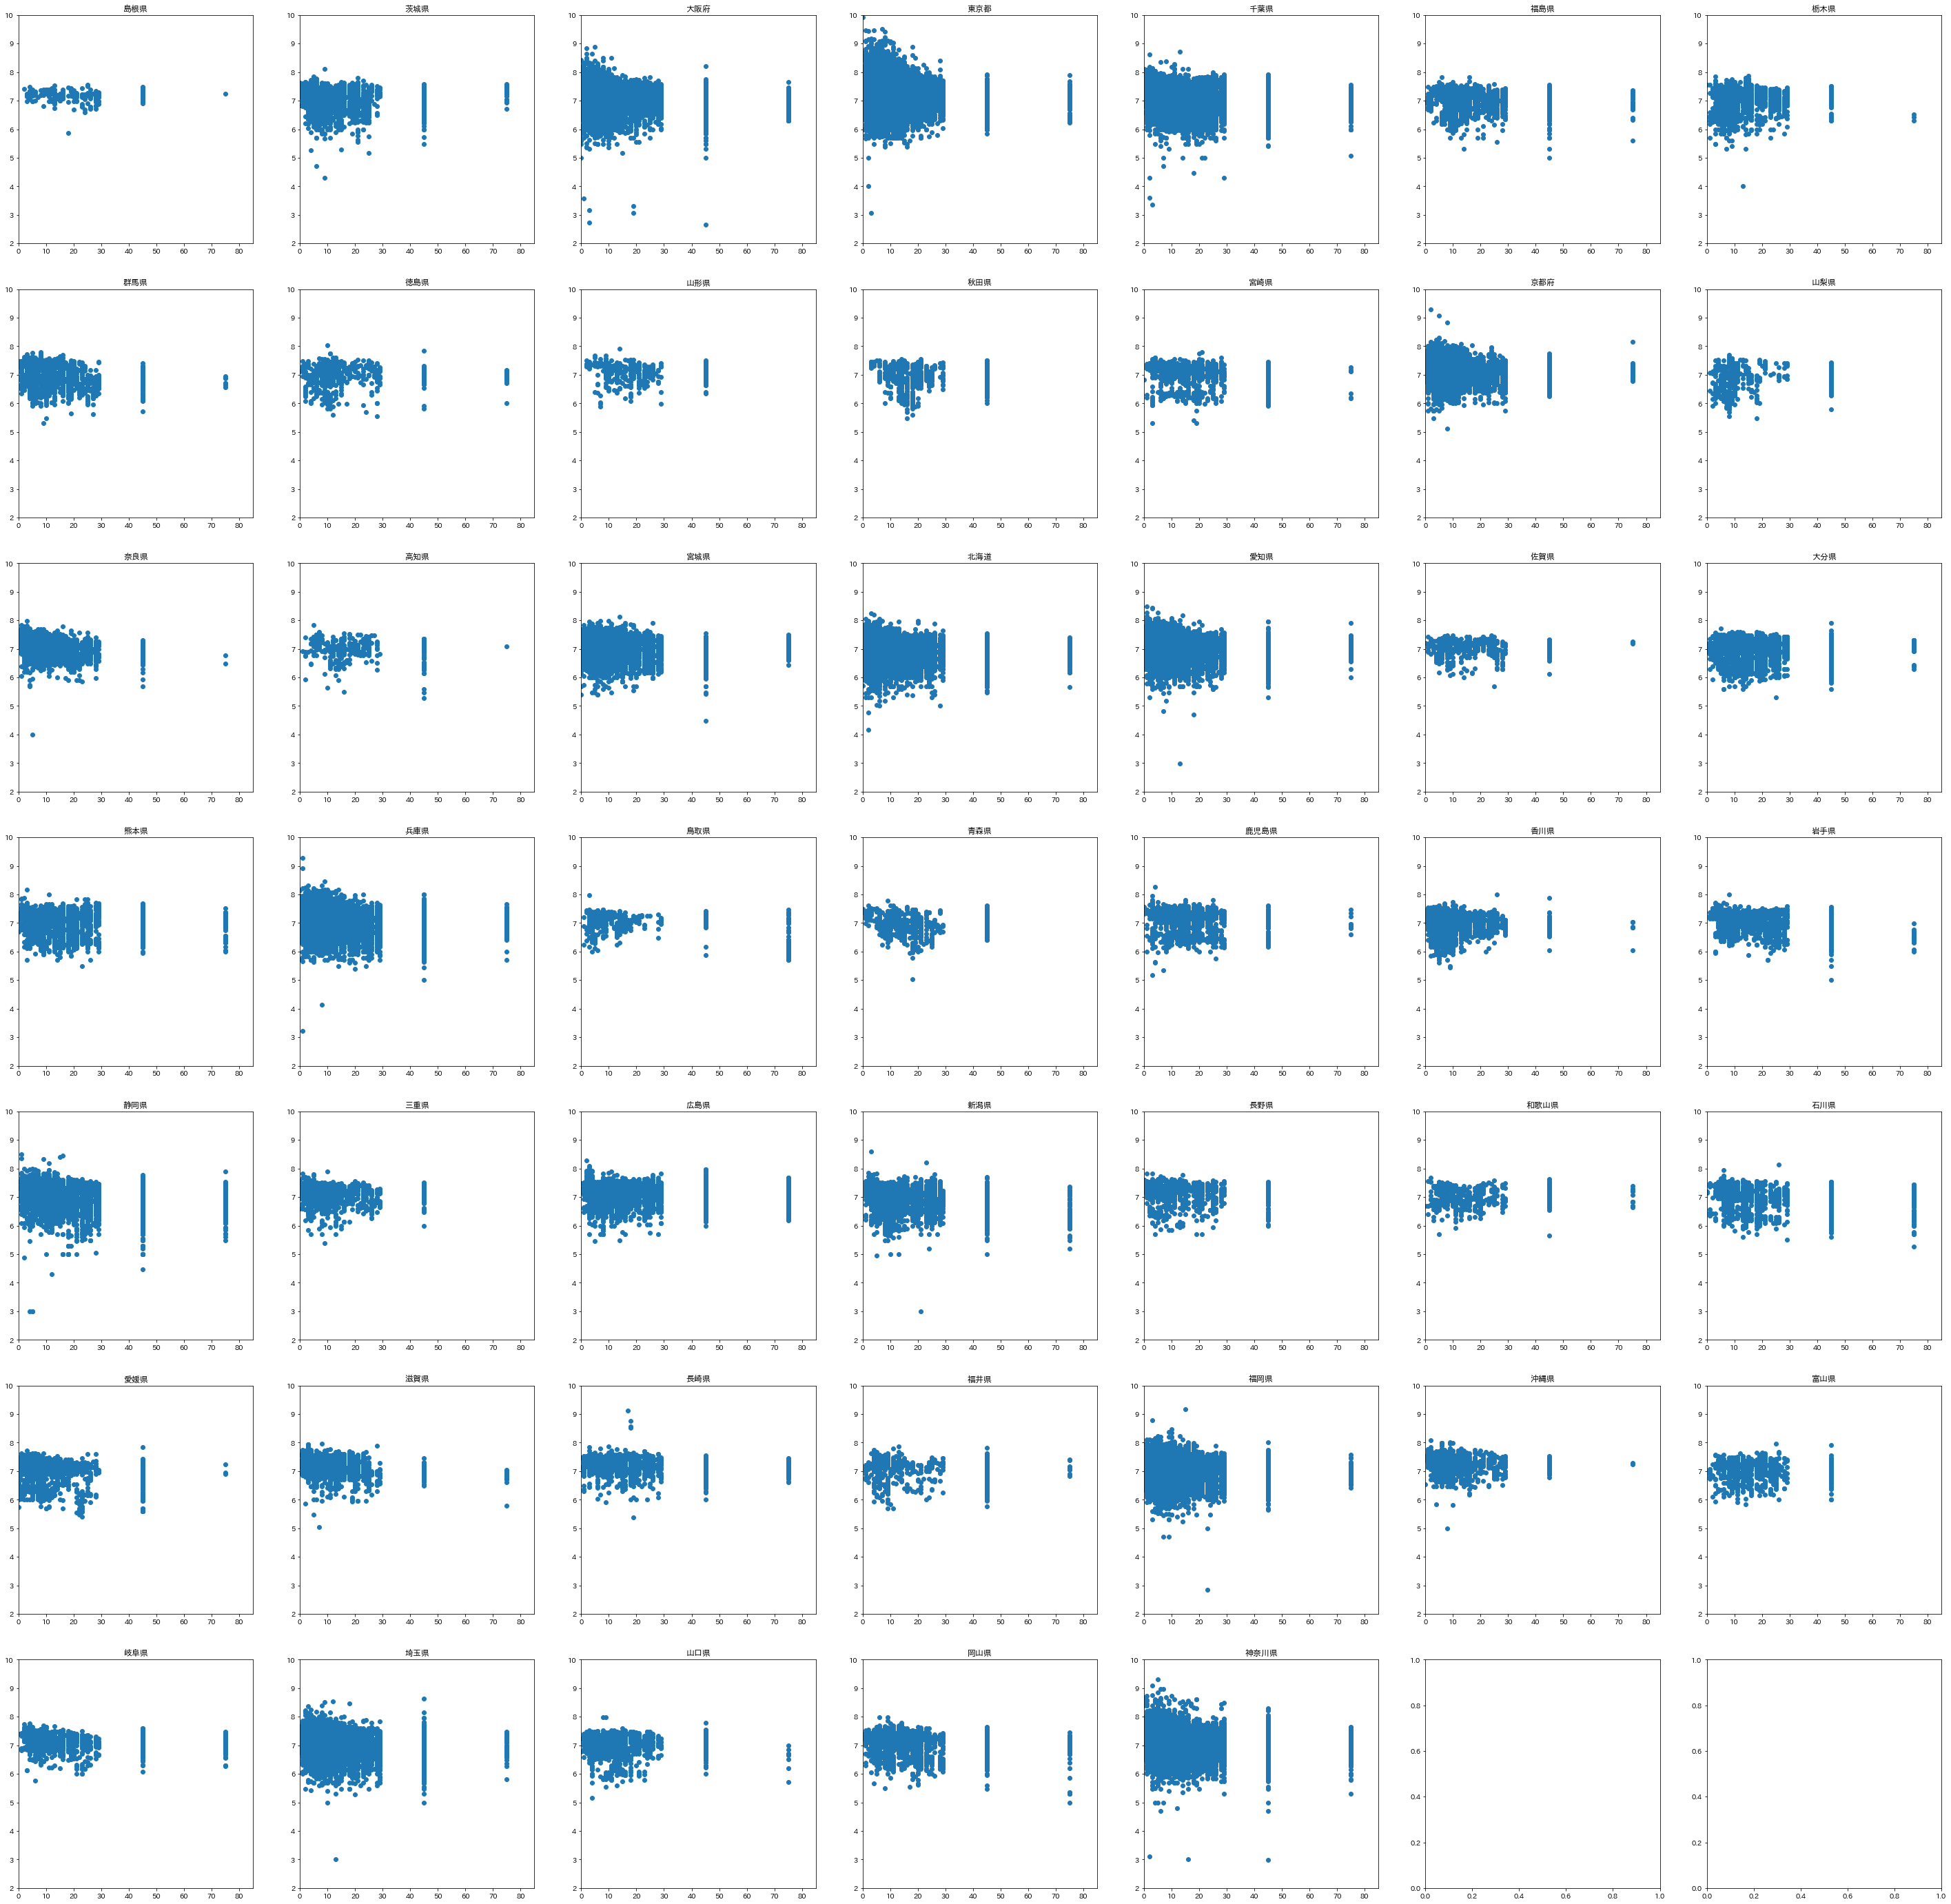

In [12]:
fig1, ax1 = plt.subplots(7, 7, figsize=(50, 50))
j = 0
for i, pref in enumerate(pref_list):
    if j == 7:
        j = 0
    ax = i // 7
    ax1[ax][j].set_title(pref)
    ax1[ax][j].scatter(df[df["都道府県名"]==pref]["最寄駅：距離（分）"], df[df["都道府県名"]==pref]["取引価格（総額）_log"])
    ax1[ax][j].set_xlim(0, 85)
    ax1[ax][j].set_ylim(2, 10)
    
    j = j + 1
plt.show()
# fig1.savefig("pref_station_distance.png")

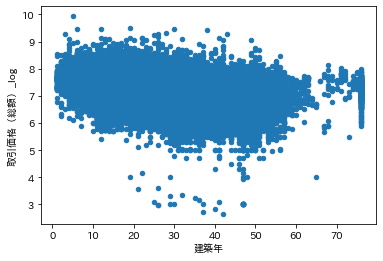

In [14]:
## 仮説: 築年数が多いほど価格が安いのではないか
df.plot.scatter(x='建築年', y='取引価格（総額）_log')
plt.show()

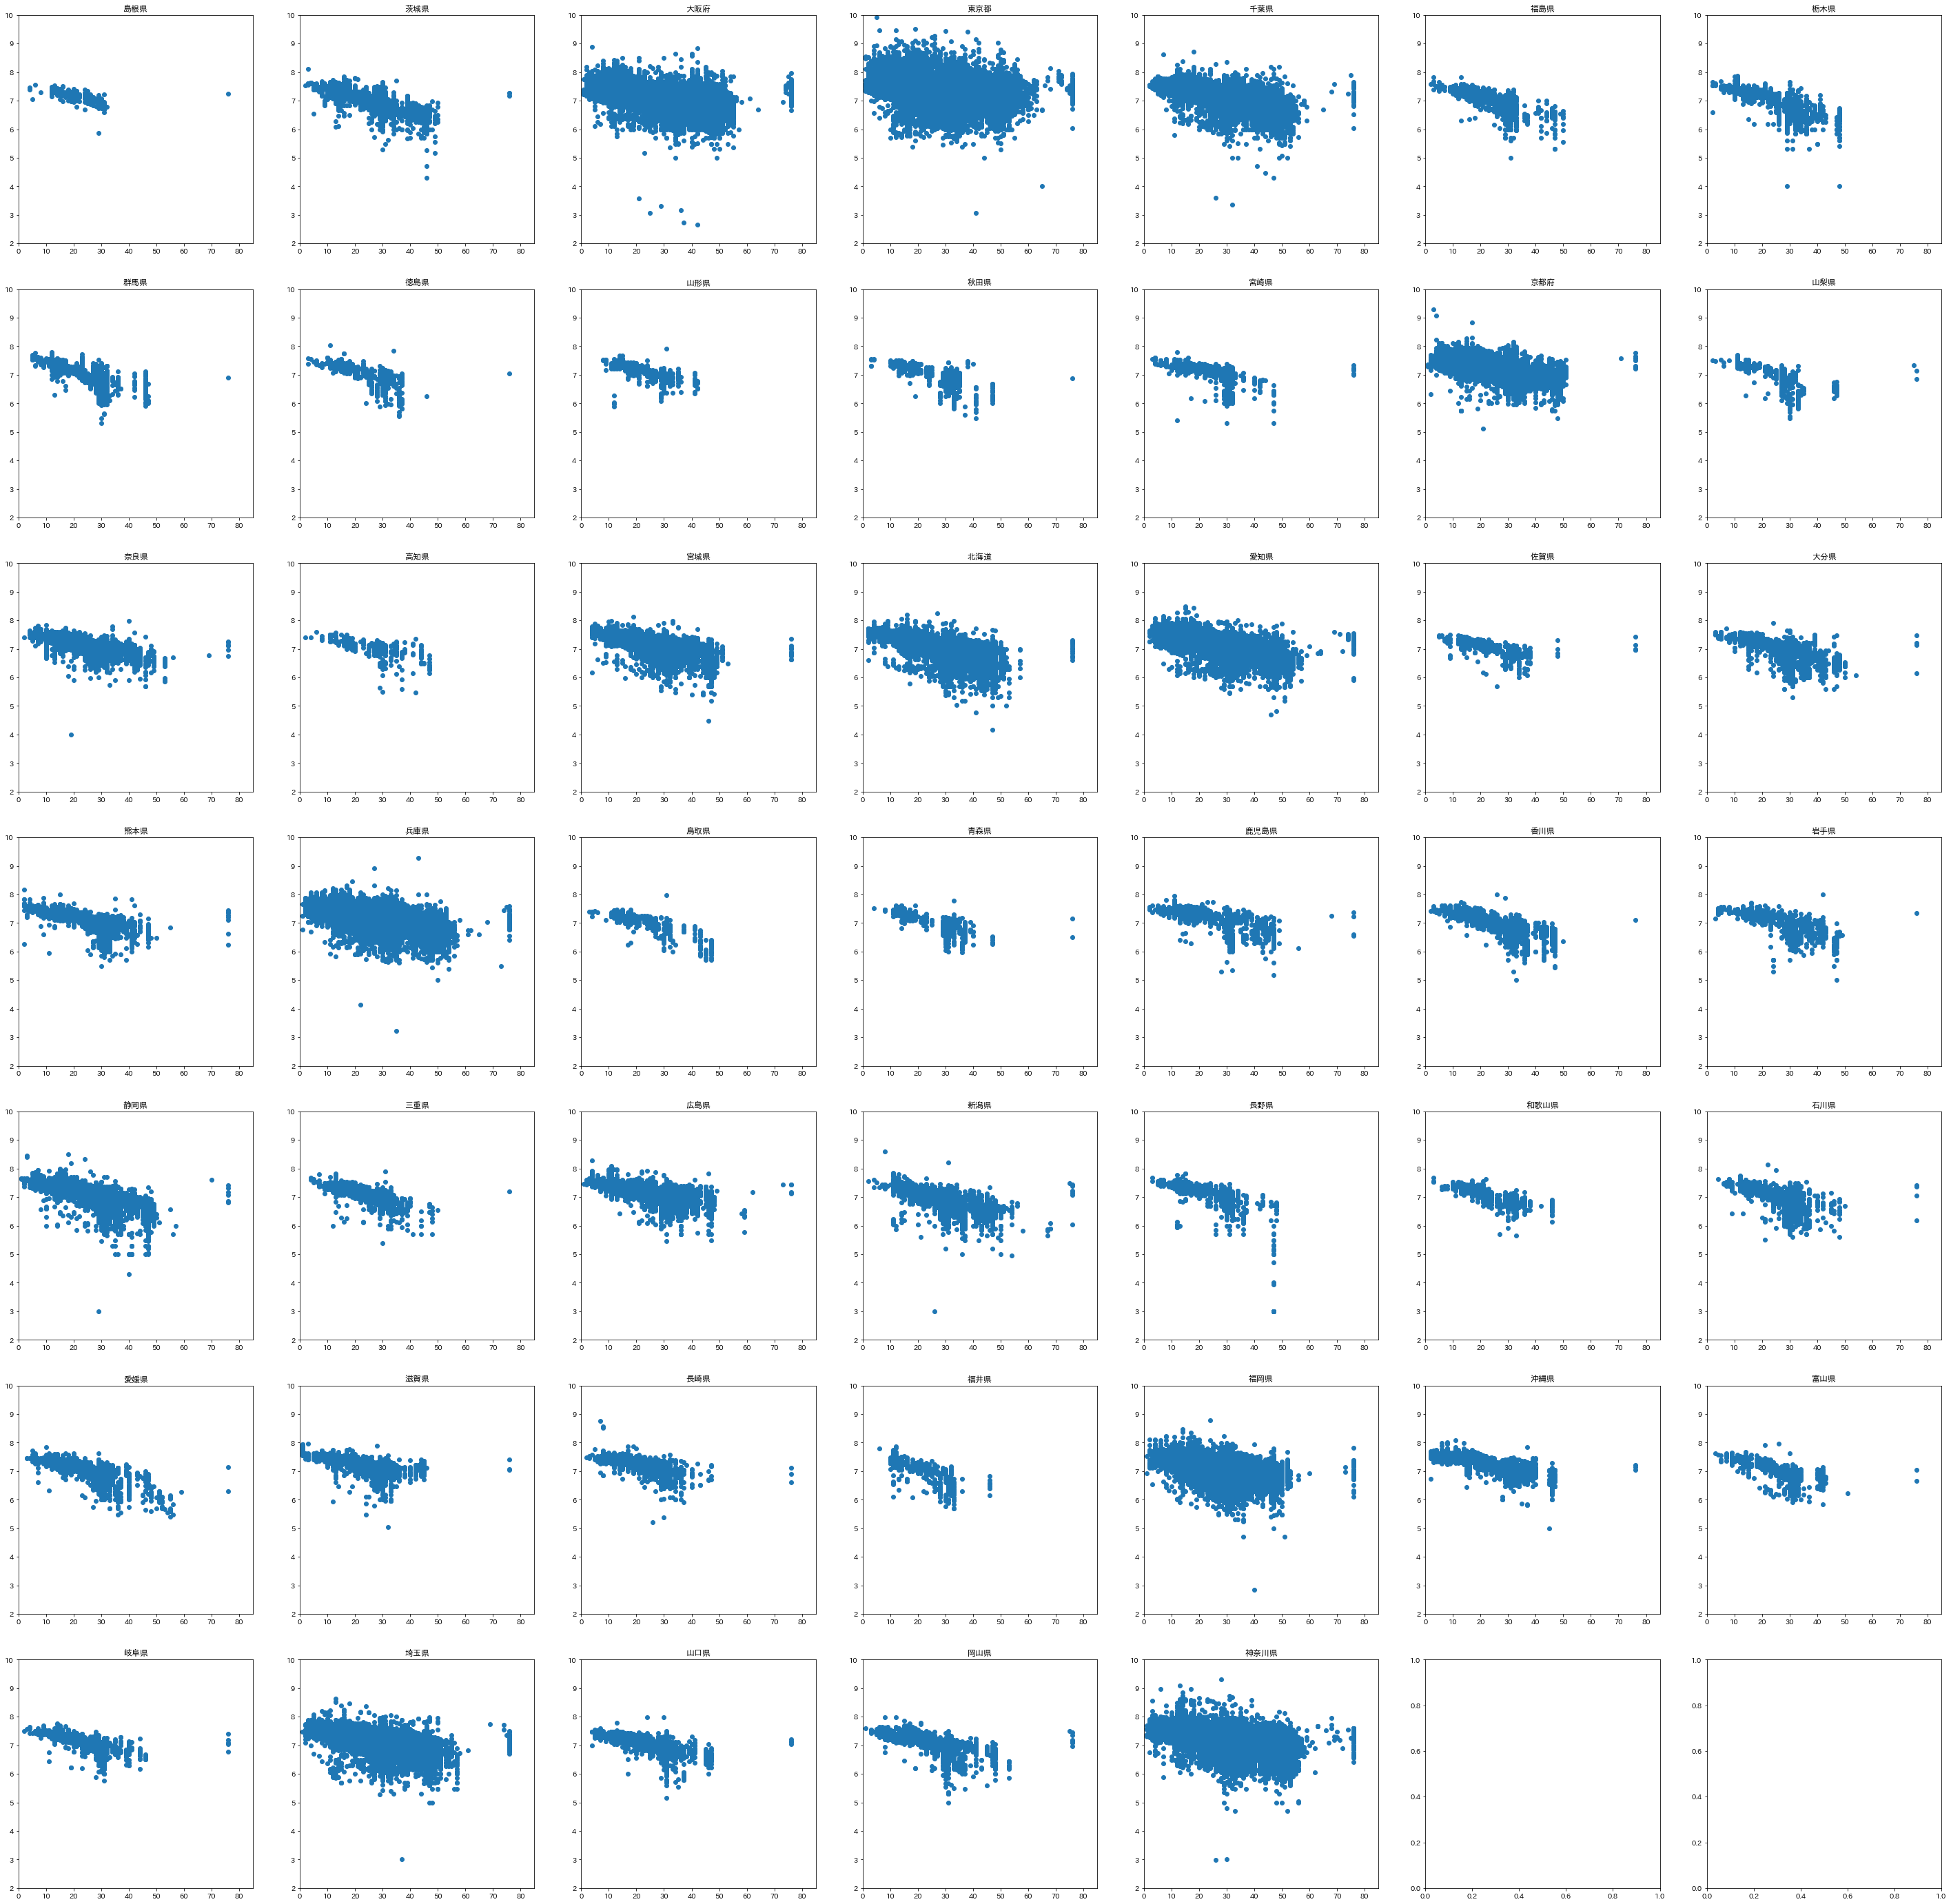

In [16]:
fig1, ax1 = plt.subplots(7, 7, figsize=(50, 50))
j = 0
for i, pref in enumerate(pref_list):
    if j == 7:
        j = 0
    ax = i // 7
    ax1[ax][j].set_title(pref)
    ax1[ax][j].scatter(df[df["都道府県名"]==pref]["建築年"], df[df["都道府県名"]==pref]["取引価格（総額）_log"])
    ax1[ax][j].set_xlim(0, 85)
    ax1[ax][j].set_ylim(2, 10)
    
    j = j + 1
plt.show()
# fig1.savefig("pref_station_distance.png")